# 4.2 Pseudorandom Number Generation

In [3]:
import numpy as np
import pandas as pd
from random import normalvariate
import matplotlib.pyplot as plt

In [4]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 0.43867379,  1.43070032, -3.54888765,  1.80869964],
       [-0.87676649, -0.09129123, -1.43100606,  0.66911545],
       [-1.41464686,  0.63326664, -0.54830651,  0.8270066 ],
       [ 1.20694917,  1.01201577,  2.56399568,  2.8271442 ]])

In [5]:
N = 1_000_000

In [38]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
1.04 s +- 11.4 ms per loop (mean +- stv. dev. of 7 runs, 1 loop each)

SyntaxError: invalid syntax (332956334.py, line 2)

In [6]:
rng = np.random.default_rng(seed=12345)

In [7]:
data = rng.standard_normal((2, 3))

In [8]:
type(rng)

numpy.random._generator.Generator

# 4.3 Universal Functions: Fast Element-Wise Array Functions

In [9]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [13]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [11]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [12]:
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [13]:
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [47]:
np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In [14]:
arr = rng.standard_normal(7) * 5
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [15]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

In [16]:
whole_part

array([ 4., -8., -0.,  2., -6., -0.,  8.])

In [17]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [18]:
out = np.zeros_like(arr)

In [19]:
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [20]:
np.add(arr, 1, out=out)
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

# 4.4 Array-Oriented Programming with Arrays

In [21]:
points = np.arange(-5, 5, 0.01)

In [22]:
xs, ys = np.meshgrid(points, points)

In [23]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [58]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

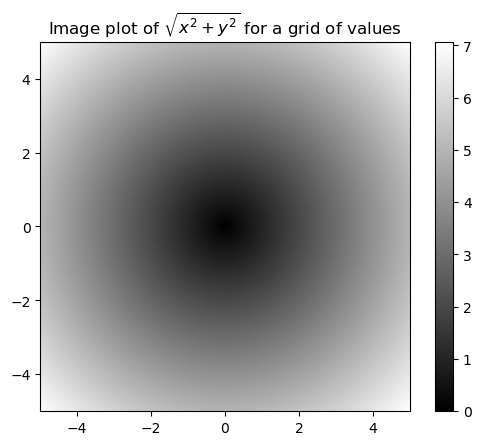

In [64]:
h = plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar(h)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

##### Expressing Conditional Logic as Array Operations

In [65]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [66]:
result = [
    (x if c else y)
    for x, y, c in zip(xarr, yarr, cond)
]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [67]:
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [68]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [69]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [70]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

##### Mathematical & Statistical Methods

In [71]:
arr = rng.standard_normal((5, 4))
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [72]:
arr.mean()

-0.08719744457434529

In [73]:
np.mean(arr)

-0.08719744457434529

In [74]:
arr.sum()

-1.743948891486906

In [75]:
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [77]:
arr.mean(axis=0)

array([-0.32584615,  0.20798129, -0.06687266, -0.16405226])

In [78]:
arr = np.array([0, 1 ,2 , 3 , 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [79]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [80]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [81]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

##### Method for Boolean Arrays

In [2]:
arr = rng.standard_normal(100)
(arr > 0).sum()

NameError: name 'rng' is not defined

In [83]:
(arr <= 0).sum()

52

In [85]:
bools = np.array([False, False, True, False])
bools.any()

True

In [86]:
bools.all()

False

##### Sorting

In [24]:
arr = rng.standard_normal(6)
arr

array([ 2.61815943,  0.77736134,  0.8286332 , -0.95898831, -1.20938829,
       -1.41229201])

In [26]:
arr.sort()
arr

array([-1.41229201, -1.20938829, -0.95898831,  0.77736134,  0.8286332 ,
        2.61815943])

In [28]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.54154683,  0.7519394 , -0.65876032],
       [-1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246],
       [-0.06615089, -1.10821447,  0.13595685],
       [ 1.34707776,  0.06114402,  0.0709146 ]])

In [30]:
arr.sort(axis=0)
arr

array([[-1.22867499, -1.10821447, -0.65876032],
       [-0.13081169,  0.06114402, -0.09296246],
       [-0.06615089,  0.25755777,  0.0709146 ],
       [ 0.54154683,  0.7519394 ,  0.13595685],
       [ 1.34707776,  1.26998312,  0.31290292]])

In [31]:
arr.sort(axis=1)
arr

array([[-1.22867499, -1.10821447, -0.65876032],
       [-0.13081169, -0.09296246,  0.06114402],
       [-0.06615089,  0.0709146 ,  0.25755777],
       [ 0.13595685,  0.54154683,  0.7519394 ],
       [ 0.31290292,  1.26998312,  1.34707776]])

In [33]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)

In [34]:
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

##### Unique & Other Set Logic

In [35]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [37]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [38]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [39]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# 4.5 File Input & Output wit Arrays

In [54]:
arr = np.arange(10)
np.save("some_array", arr)

In [55]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
np.savez("array_archive.npz", a=arr, b=arr)

In [60]:
arch = np.load("array_archive.npz")

In [61]:
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

# 4.6 Linear Algebra

In [63]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [64]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [65]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [66]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [67]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [68]:
x @ np.ones(3)

array([ 6., 15.])

In [69]:
from numpy.linalg import inv, qr

In [71]:
X = rng.standard_normal((5, 5))

In [73]:
mat = X.T @ X
inv(mat)

array([[3427.71608857,  319.0318542 , -601.05183074,  464.14828715,
         808.10905209],
       [ 319.0318542 ,   29.97937432,  -56.01762388,   43.36721476,
          75.32049066],
       [-601.05183074,  -56.01762388,  105.75734588,  -81.56532808,
        -142.18705629],
       [ 464.14828715,   43.36721476,  -81.56532808,   63.25789163,
         109.67732312],
       [ 808.10905209,   75.32049066, -142.18705629,  109.67732312,
         191.76688747]])

In [74]:
mat @ inv(mat)

array([[ 1.00000000e+00, -1.66578093e-14,  9.13747445e-15,
        -1.48913095e-14, -2.86878287e-14],
       [-4.31123288e-13,  1.00000000e+00,  3.63057224e-14,
        -6.57834784e-15, -3.24192578e-14],
       [ 2.51099539e-13, -1.30474648e-14,  1.00000000e+00,
         7.82471930e-15, -4.82608743e-14],
       [-1.64586613e-13,  1.22983973e-15,  2.90257620e-14,
         1.00000000e+00, -2.00082851e-14],
       [ 2.81998188e-13,  4.52020823e-14, -8.09614459e-14,
         7.34143343e-14,  1.00000000e+00]])

# 4.7 Example: Random Walks

In [75]:
'''
blockstart

import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend
'''

'\nblockstart\n\nimport random\nposition = 0\nwalk = [position]\nnsteps = 1000\nfor _ in range(nsteps):\n    step = 1 if random.randint(0, 1) else -1\n    position += step\n    wal.append(position)\n#! blockend\n'

In [77]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

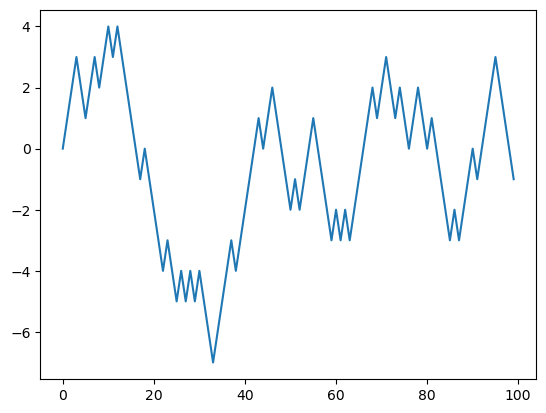

In [79]:
plt.plot(walk[:100])
plt.show()

In [80]:
nsteps= 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [82]:
walk.min()

-8

In [83]:
walk.max()

50

In [84]:
(np.abs(walk) >= 10).argmax()

155

##### Simulating Many Random Walks at Once

In [85]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)

In [86]:
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [87]:
walks.max()

114

In [88]:
walks.min()

-120

In [91]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [92]:
hits30

array([False,  True,  True, ...,  True, False,  True])

In [93]:
hits30.sum()

3395

In [94]:
crossing_times = (np.abs(walks[hits30])>= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

In [95]:
crossing_times.mean()

500.5699558173785